The easiest way to load image data is with datasets.ImageFolder from torchvision (documentation). In general we can use ImageFolder like so:

dataset = datasets.ImageFolder('path/to/data', transform=transform)
where 'path/to/data' is the file path to the data directory and transform is a sequence of processing steps built with the transforms module from torchvision. ImageFolder expects the files and directories to be constructed like so:
```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```
where each class has it's own directory (cat and dog) for the images. The images are then labeled with the class taken from the directory name. So here, the image 123.png would be loaded with the class label cat.

### Transforms
When you load in the data with ImageFolder, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with transforms.Resize() or crop with transforms.CenterCrop(), transforms.RandomResizedCrop(), etc. We'll also need to convert the images to PyTorch tensors with transforms.ToTensor(). Typically you'll combine these transforms into a pipeline with transforms.Compose(), which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
There are plenty of other transforms available.

### Data Loaders
With the ImageFolder loaded, you have to pass it to a DataLoader. The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```
Here dataloader is a generator. To get data out of it, you need to loop through it or convert it to an iterator and call `next()`.


```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper
from torch import nn, optim

In [3]:
path = r"Cat_Dog_data\train"

transform = transforms.Compose([transforms.Resize(255),           #Resizing the images to 255X255 pixels
                                transforms.CenterCrop(224),       #Cropping center of the images resulting in 224X224 pixels
                                transforms.ToTensor()])           #Converting images to PyTorch tensors

dataset = datasets.ImageFolder(path, transform = transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

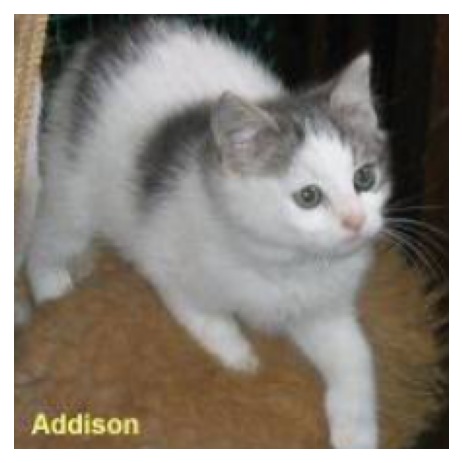

In [4]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize = False)

tensor([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1])


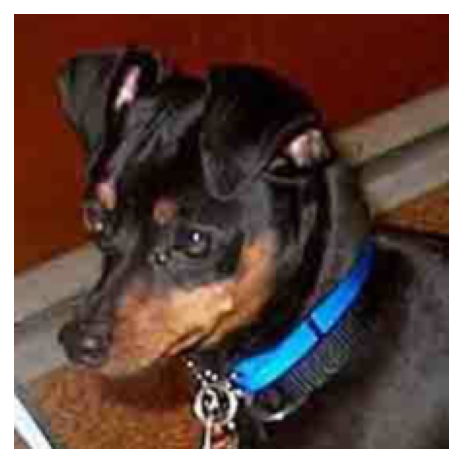

In [5]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)
print(labels)                                 #1 = dog; 0 = cat

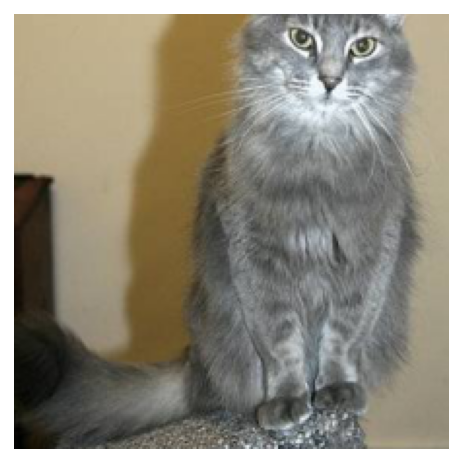

In [6]:
helper.imshow(images[1], normalize=False)

## Data Augmentation

A common strategy for training neural networks is to introduce randomness in the input data itself. For example, we can randomly rotate, mirror, scale, and/or crop your images during training. This will help our network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

To randomly rotate, scale and crop, then flip the images we can define your transforms like this:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

We'll also typically want to normalize images with `transforms.Normalize`. We pass in a list of means and list of standard deviations, then the color channels are normalized like so

```input[channel] = (input[channel] - mean[channel]) / std[channel]```

Subtracting `mean` centers the data around zero and dividing by `std` squishes the values to be between -1 and 1. Normalizing helps keep the network weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

List of all the available transforms are [here](http://pytorch.org/docs/0.3.0/torchvision/transforms.html). When testing however, we want to use images that aren't altered other than normalizing. So, for validation/test images, we can just resize and crop.

In [7]:
data_dir = r"Cat_Dog_data"

train_transforms = transforms.Compose([transforms.RandomRotation(30),      #Rotate image in either direction by 30°
                                       transforms.RandomResizedCrop(224),  #Crop image to random size & aspect ratio, crop is finally resized to specified size
                                       transforms.RandomHorizontalFlip(),  #Horizontally flip the image randomly with a given probability; default = 0.5
                                       transforms.ToTensor()])             #Convert images to PyTorch tensors

test_transforms = transforms.Compose([transforms.Resize(255),              #Resize images to 255X255 pixels
                                     transforms.CenterCrop(224),           #Crop given image at the center with --> 224X224 pixels
                                     transforms.ToTensor()])               #Convert images to PyTorch tensors

train_data = datasets.ImageFolder(data_dir+'/train', transform = train_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32)

test_data = datasets.ImageFolder(data_dir+"/test", transform = test_transforms)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32)

Training Set Images


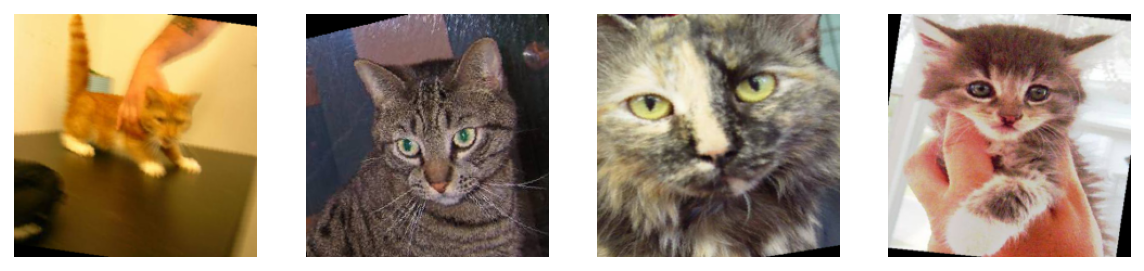

In [8]:
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
print("Training Set Images")
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax = ax, normalize = False)

Test Set Images


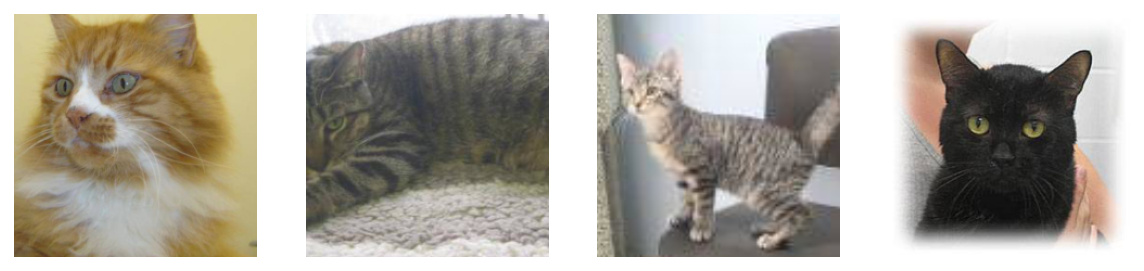

In [9]:
images, labels = next(iter(test_loader))
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
print("Test Set Images")
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax = ax, normalize = False)